In [3]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

In [4]:
def load_efficent_reports_file(path, model_name):
    # total_rows = []
    # for percent in range(10, 101, 10):
    #     df = pd.read_csv(f'{path}/summary_efficiency_{percent}.csv')
    #     df = df.drop(['Unnamed: 1', 'percentage.1'], axis=1)
    #     df.loc[df.index[-1], 'model'] = model_name
    #     total_rows.append(df.tail(1))
    df = pd.read_csv(f'{path}/summary_efficiency.csv')
    df = df.drop(['Unnamed: 0'], axis=1)
    df = df.drop(df.index[-1])
    df['model'] = model_name
    return df

def visualize_gpu_memory(data):
    grouped_data = data.groupby('model')
    # Plot each group separately
    for name, group in grouped_data:
        plt.plot(group['percentage'], group['gpu_used'], marker='o', label=name)

    # Add labels and legend
    plt.xlabel('Subset Size (%)')
    plt.ylabel('GPU Memory Peak Usage (MB)')
    plt.legend(title='Model')

    # Show plot
    plt.show()

def visualize_train_time(data):
    grouped_data = data.groupby('model')
    # Plot each group separately
    for name, group in grouped_data:
        plt.plot(group['percentage'], group['elapsed_time']/60, marker='o', label=name)

    # Add labels and legend
    plt.xlabel('Subset Size (%)')
    plt.ylabel('Running Time (minutes)')
    plt.legend(title='Model', loc=2)
    
    # # Increase fractional part of y-axis with decimal formatting
    # def format_func(value, tick_number):
    #     return f'{value:.2f}'

    # plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

    # # Set y-axis range
    # # plt.ylim(2000, 3000)  # Set y-axis range from 1.5 to 2.5 minutes

    # # Set y-tick interval
    # plt.gca().yaxis.set_major_locator(MultipleLocator(0.01))
    
    # Show plot
    plt.show()

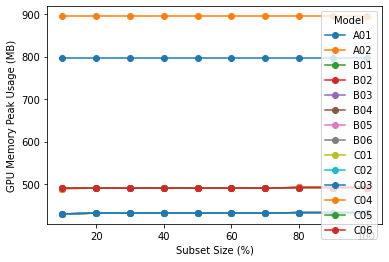

In [3]:
efficient_total = pd.read_csv('efficient_total.csv')
visualize_gpu_memory(efficient_total)

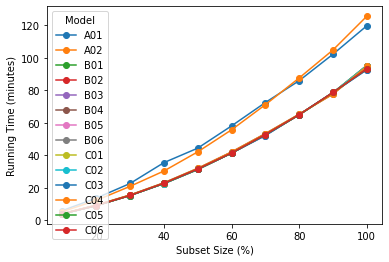

In [4]:
visualize_train_time(efficient_total)

In [16]:
import torch
from torch import nn
from torch.nn import CrossEntropyLoss, MSELoss
import torch.nn.functional as F

In [17]:
model_path = 'save/ag-news-bert-whitening/ag-news-bert-whitening-ZCA/best_model_0.th'
state_dict = torch.load(model_path)

In [18]:
# Inspect the state dictionary
print("State Dictionary keys:", state_dict.keys())

# You can inspect individual keys and their contents
# For example, if you want to see the shape and type of the tensors in a model's state dictionary
for key in state_dict:
    tensor = state_dict[key]
    print(f"{key}: shape = {tensor.shape}, dtype = {tensor.dtype}")

State Dictionary keys: odict_keys(['classifier.1.lstm.weight_ih_l0', 'classifier.1.lstm.weight_hh_l0', 'classifier.1.lstm.bias_ih_l0', 'classifier.1.lstm.bias_hh_l0', 'classifier.1.lstm.weight_ih_l0_reverse', 'classifier.1.lstm.weight_hh_l0_reverse', 'classifier.1.lstm.bias_ih_l0_reverse', 'classifier.1.lstm.bias_hh_l0_reverse', 'classifier.1.lstm.weight_ih_l1', 'classifier.1.lstm.weight_hh_l1', 'classifier.1.lstm.bias_ih_l1', 'classifier.1.lstm.bias_hh_l1', 'classifier.1.lstm.weight_ih_l1_reverse', 'classifier.1.lstm.weight_hh_l1_reverse', 'classifier.1.lstm.bias_ih_l1_reverse', 'classifier.1.lstm.bias_hh_l1_reverse', 'classifier.2.weight', 'classifier.2.bias'])
classifier.1.lstm.weight_ih_l0: shape = torch.Size([128, 256]), dtype = torch.float32
classifier.1.lstm.weight_hh_l0: shape = torch.Size([128, 32]), dtype = torch.float32
classifier.1.lstm.bias_ih_l0: shape = torch.Size([128]), dtype = torch.float32
classifier.1.lstm.bias_hh_l0: shape = torch.Size([128]), dtype = torch.float32

In [19]:
model_path = 'save/ag-news-bert-whitening/ag-news-bert-whitening-zca-modified/best_model_0.th'
state_dict = torch.load(model_path)

In [20]:
# Inspect the state dictionary
print("State Dictionary keys:", state_dict.keys())

# You can inspect individual keys and their contents
# For example, if you want to see the shape and type of the tensors in a model's state dictionary
for key in state_dict:
    tensor = state_dict[key]
    print(f"{key}: shape = {tensor.shape}, dtype = {tensor.dtype}")

State Dictionary keys: odict_keys(['classifier.1.lstm.weight_ih_l0', 'classifier.1.lstm.weight_hh_l0', 'classifier.1.lstm.bias_ih_l0', 'classifier.1.lstm.bias_hh_l0', 'classifier.1.lstm.weight_ih_l0_reverse', 'classifier.1.lstm.weight_hh_l0_reverse', 'classifier.1.lstm.bias_ih_l0_reverse', 'classifier.1.lstm.bias_hh_l0_reverse', 'classifier.1.lstm.weight_ih_l1', 'classifier.1.lstm.weight_hh_l1', 'classifier.1.lstm.bias_ih_l1', 'classifier.1.lstm.bias_hh_l1', 'classifier.1.lstm.weight_ih_l1_reverse', 'classifier.1.lstm.weight_hh_l1_reverse', 'classifier.1.lstm.bias_ih_l1_reverse', 'classifier.1.lstm.bias_hh_l1_reverse', 'classifier.2.weight', 'classifier.2.bias'])
classifier.1.lstm.weight_ih_l0: shape = torch.Size([128, 256]), dtype = torch.float32
classifier.1.lstm.weight_hh_l0: shape = torch.Size([128, 32]), dtype = torch.float32
classifier.1.lstm.bias_ih_l0: shape = torch.Size([128]), dtype = torch.float32
classifier.1.lstm.bias_hh_l0: shape = torch.Size([128]), dtype = torch.float32

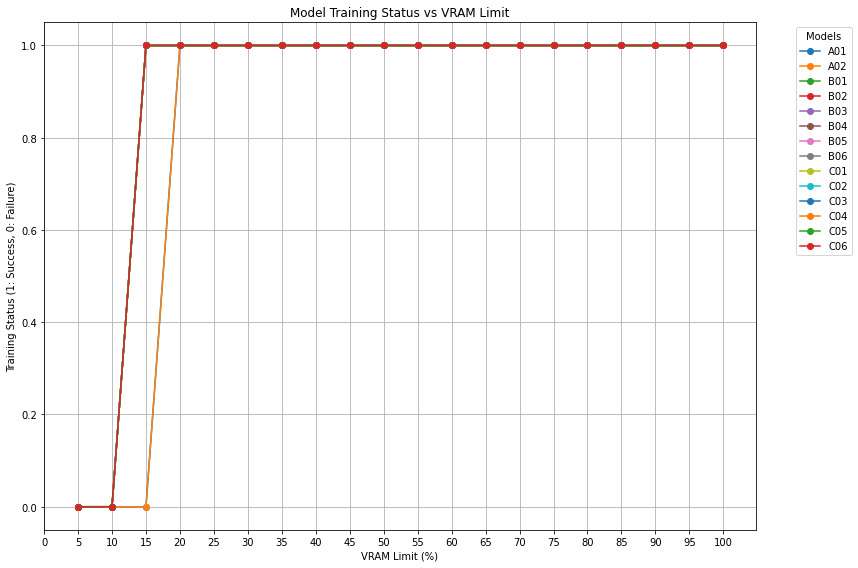

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'vram_training_status.csv'  # Path to your CSV file
data = pd.read_csv(file_path)

# Sort the DataFrame by 'vram_limit' in descending order
data = data.sort_values(by='vram_limit', ascending=False)

# Convert numerical data to int if necessary (not required here as it's already in int format)

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot each model's training status
for column in data.columns[1:]:
    plt.plot(data['vram_limit'], data[column], marker='o', label=column)

# Adding titles and labels
plt.title('Model Training Status vs VRAM Limit')
plt.xlabel('VRAM Limit (%)')
plt.ylabel('Training Status (1: Success, 0: Failure)')
plt.xticks(range(0, 105, 5))  # Set x-axis ticks from 0 to 100 with a step of 5
plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [8]:
total_data = []

# BENCHMARK
path = 'save/ag-news-normal/bert_benchmark_b64_step1_gamma0.9_lr1e-4_early1_layer2_lowerTrue'
model_name = 'a01' 
data = load_efficent_reports_file(path, model_name)

total_data = data

path = 'save/ag-news-normal/roberta_benchmark_b64_step1_gamma0.9_lr1e-4_early1_layer2_lowerTrue'
model_name = 'a02' 
data = load_efficent_reports_file(path, model_name)
total_data =pd.concat([total_data, data], ignore_index=True)

# MODIFIED 1
path = 'save/ag-news-bert-whitening-svd/ag-news-bert-whitening-svd-bilstm'
model_name = 'b01' 
data = load_efficent_reports_file(path, model_name)
total_data =pd.concat([total_data, data], ignore_index=True)

path = 'save/ag-news-bert-whitening-pca/ag-news-bert-whitening-pca-bilstm'
model_name = 'b02' 
data = load_efficent_reports_file(path, model_name)
total_data =pd.concat([total_data, data], ignore_index=True)

path = 'save/ag-news-bert-whitening-zca/ag-news-bert-whitening-zca-bilstm'
model_name = 'b03' 
data = load_efficent_reports_file(path, model_name)
total_data =pd.concat([total_data, data], ignore_index=True)

path = 'save/ag-news-roberta-whitening-svd/ag-news-roberta-whitening-svd-bilstm'
model_name = 'b04' 
data = load_efficent_reports_file(path, model_name)
total_data =pd.concat([total_data, data], ignore_index=True)

path = 'save/ag-news-roberta-whitening-pca/ag-news-roberta-whitening-pca-bilstm'
model_name = 'b05' 
data = load_efficent_reports_file(path, model_name)
total_data =pd.concat([total_data, data], ignore_index=True)

path = 'save/ag-news-roberta-whitening-zca/ag-news-roberta-whitening-zca-bilstm'
model_name = 'b06' 
data = load_efficent_reports_file(path, model_name)
total_data =pd.concat([total_data, data], ignore_index=True)



# MODIFIED 2
path = 'save/ag-news-bert-whitening-svd/ag-news-bert-whitening-svd-mlp'
model_name = 'c01' 
data = load_efficent_reports_file(path, model_name)
total_data =pd.concat([total_data, data], ignore_index=True)

path = 'save/ag-news-bert-whitening-pca/ag-news-bert-whitening-pca-mlp'
model_name = 'c02' 
data = load_efficent_reports_file(path, model_name)
total_data =pd.concat([total_data, data], ignore_index=True)

path = 'save/ag-news-bert-whitening-zca/ag-news-bert-whitening-zca-mlp'
model_name = 'c03' 
data = load_efficent_reports_file(path, model_name)
total_data =pd.concat([total_data, data], ignore_index=True)

path = 'save/ag-news-roberta-whitening-svd/ag-news-roberta-whitening-svd-mlp'
model_name = 'c04' 
data = load_efficent_reports_file(path, model_name)
total_data =pd.concat([total_data, data], ignore_index=True)

path = 'save/ag-news-roberta-whitening-pca/ag-news-roberta-whitening-pca-mlp'
model_name = 'c05' 
data = load_efficent_reports_file(path, model_name)
total_data =pd.concat([total_data, data], ignore_index=True)

path = 'save/ag-news-roberta-whitening-zca/ag-news-roberta-whitening-zca-mlp'
model_name = 'c06' 
data = load_efficent_reports_file(path, model_name)
total_data =pd.concat([total_data, data], ignore_index=True)

total_data['elapsed_time'] = pd.to_numeric(total_data['elapsed_time'])

total_data

# df_total = pd.concat(total_data, ignore_index=True)
# df_total.to_csv('efficient_total.csv', index=False, header=['percentage', 'ket', 'elapse_time', 'gpu_used', 'model'] )

,ket,elapsed_time,gpu_used,model
0,Dataloader,13.504438,0.000000,a01
1,Train,7299.765366,797.822266,a01
2,Test,128.125436,838.436035,a01
3,Dataloader,13.388021,0.000000,a02
4,Train,7436.341808,895.630859,a02
5,Test,122.637464,959.011719,a02
6,Dataloader,1608.141861,432.078613,b01
7,Train,3869.838597,432.078613,b01
8,Test,78.297206,432.078613,b01
9,Dataloader,1615.337649,432.078613,b02


ket model  Dataloader      Test       Train
0     a01    0.225074  2.135424  121.662756
1     a02    0.223134  2.043958  123.939030
2     b01   26.802364  1.304953   64.497310
3     b02   26.922294  1.409767   68.151468
4     b03   26.146438  1.315658   62.969874
5     b04   28.294464  1.301089   63.164831
6     b05   27.585535  1.326382   63.480006
7     b06   27.163289  1.307696   63.372474
8     c01   28.031180  1.364609   62.954917
9     c02   26.693129  1.284682   62.607377
10    c03   26.899930  1.286296   61.935071
11    c04   28.090098  1.268400   62.004490
12    c05   27.260470  1.292537   62.674086
13    c06   26.752867  1.293970   62.083280


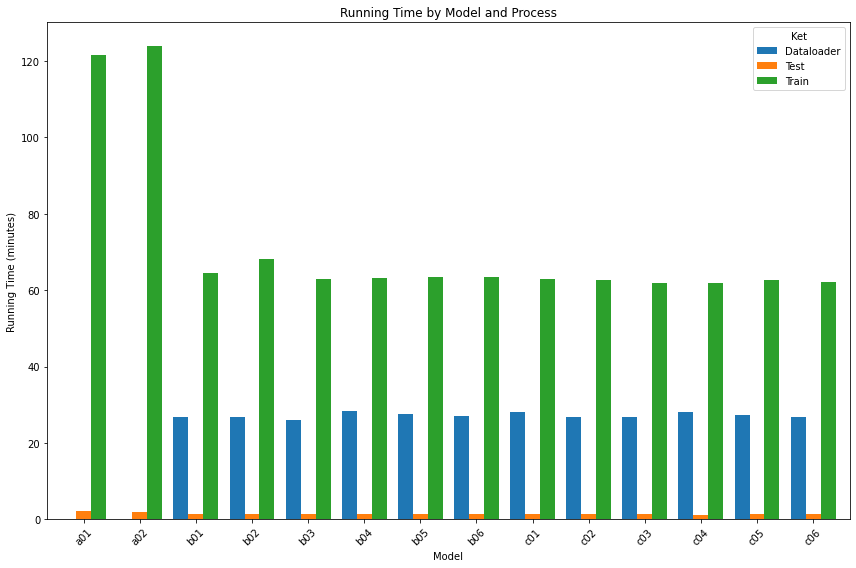

In [9]:
import re

df = total_data
df['elapsed_time'] = df['elapsed_time'] / 60

# Group by 'model' and 'ket', and calculate the mean of 'elapsed_time'
grouped_df = df.groupby(['model', 'ket'])['elapsed_time'].mean().unstack().reset_index()

print(grouped_df)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
grouped_df.set_index('model').plot(kind='bar', ax=ax, width=0.8)
ax.set_xlabel('Model')
ax.set_ylabel('Running Time (minutes)')
ax.set_title('Running Time by Model and Process')
ax.legend(title='Ket')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ket model  Dataloader        Test       Train
0     a01    0.000000  838.436035  797.822266
1     a02    0.000000  959.011719  895.630859
2     b01  432.078613  432.078613  432.078613
3     b02  432.078613  432.078613  432.078613
4     b03  432.078613  432.078613  432.078613
5     b04  491.073730  491.073730  491.073730
6     b05  491.073730  491.073730  491.073730
7     b06  491.073730  491.073730  491.073730
8     c01  431.702637  431.702637  431.702637
9     c02  431.702637  431.702637  431.702637
10    c03  431.702637  431.702637  431.702637
11    c04  490.697754  490.697754  490.697754
12    c05  490.697754  490.697754  490.697754
13    c06  490.697754  490.697754  490.697754


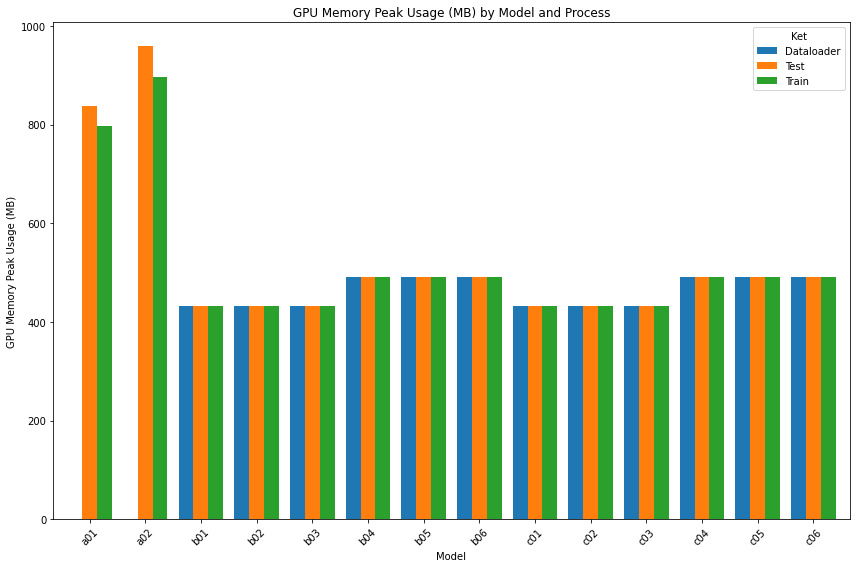

In [10]:
# Group by 'model' and 'ket', and calculate the mean of 'elapsed_time'
grouped_df = df.groupby(['model', 'ket'])['gpu_used'].mean().unstack().reset_index()

print(grouped_df)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
grouped_df.set_index('model').plot(kind='bar', ax=ax, width=0.8)
ax.set_xlabel('Model')
ax.set_ylabel('GPU Memory Peak Usage (MB)')
ax.set_title('GPU Memory Peak Usage (MB) by Model and Process')
ax.legend(title='Ket')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()